In [1]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.datasets import load_iris

iris = load_iris()

dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
print(iris.target, iris.target.shape)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

(150,)

In [5]:
print(iris.target[iris.target==0].shape, iris.target[iris.target==1].shape, iris.target[iris.target==2].shape)

(50,)

(50,)

(50,)

In [7]:
print(iris.data.shape, iris.data[:5])

(150, 4) [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


## 훈련 세트와 테스트세트로 분리
- 머신러닝은 훈련 과정과 테스트 과정 두가지로 분리된다.
- 훈련세트를 가지고 예측모델을 훈련시킨 다음에 테스트세트로 훈련 성과를 판단한다.
- sklearn.model_selection.train_test_split() 함수를 사용하면 편리하게 나눌 수 있다.
- train_test_split() 함수는 기본값으로 훈련세트를 75%, 테스트세트를 25%로 나눈다.

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target)
# 데이터를 모두 집어넣어 분석해 모델을 만들 수 있겠지만 새로운 데이터가 나타나야 그 모델을 테스트 할 수 있다.
# 그러므로 모델을 만들 때 일부를 남겨두고 모델을 만든다음, 그 남겨진 데이터를 테스트용 데이터로서 사용한다.

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape) # (112, 4) (38, 4) (112,) (38,)
# 아이리스 데이터가 150x4, 타겟이 150x1인데 데이터를 훈련용으로 112x4, 테스트용으로 38x4, 타겟을 훈련용으로 112x1, 테스트용으로 38x1로 나눈다.

(112, 4) (38, 4) (112,) (38,)


In [9]:
print(x_train[:5], y_train[:5])

[[5.  3.4 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [4.8 3.  1.4 0.1]
 [6.7 2.5 5.8 1.8]
 [6.6 2.9 4.6 1.3]] [0 0 0 2 1]


4가지 속성에 대해 산점도 그리기
-산점도는 두 가지 속성을 가진 데이터를 그래프에 점을 찍어 표시한 그림이다.

In [10]:
import pandas as pd
iris_df = pd.DataFrame(x_train, columns=iris.feature_names)
iris_df[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.0,3.4,1.5,0.2
1,5.0,3.2,1.2,0.2
2,4.8,3.0,1.4,0.1
3,6.7,2.5,5.8,1.8
4,6.6,2.9,4.6,1.3


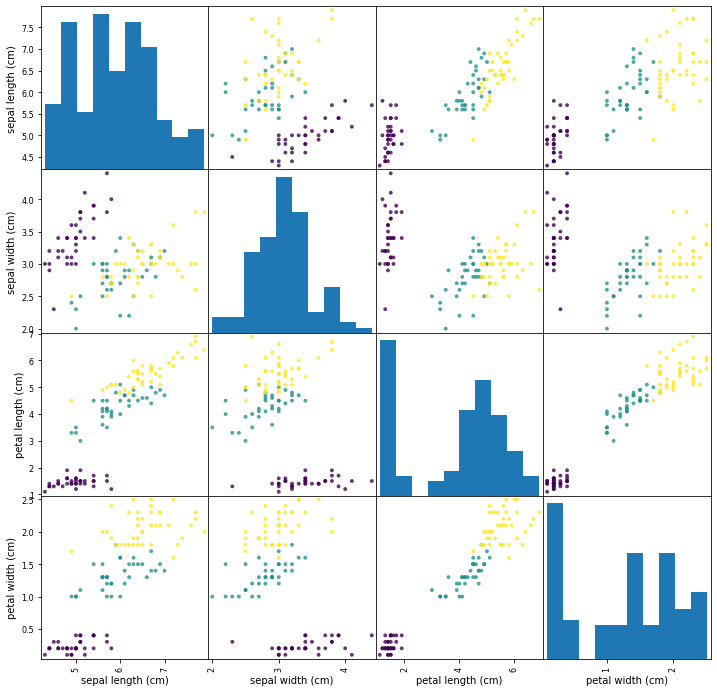

In [12]:
pd.plotting.scatter_matrix(iris_df, c=y_train, s=60, alpha=0.8, figsize=[12,12])
# scatter_matrix라는 함수를 이용하기 위해서 pandas를 사용했다.
# 데이터에서 2개씩 짝지어서 6개의 산점도를 그렸다.
# 자기 자신은 히스토그램
print('')

## k-NN(최근접 이웃) 예측모델 적용
- k-NN 모델은 가장 가까이에 있는 k 갯수의 이웃 점들을 기준으로 예측하는 머신러닝 모델이다.
- 모델을 정의하고 fit() 함수를 호출하는 두 줄로 모델 훈련은 끝난다.
- 기하적인 특성

In [13]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1) # 기본값은 5
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## 임의의 점을 이용하여 예측
- 아래 코드는 (6,3,4,1.5)의 값을 가지는 샘플에 대한 예측 결과이다. (1 이므로 versicolor)

In [14]:
model.predict([[6,3,4,1.5]]) # 샘플이 하나라도 2차원 array를 넘겨야 한다.

array([1])

## 모델 평가
-모델을 만들었으므로 얼마나 정확한지 테스트세트인 x_test, y_test 성능을 확인
-0.973의 결과는 테스트세트에서 97.3%를 정확히 예측했다는 의미이다.

In [16]:
score = model.score(x_test, y_test)
print(score) # 0.9473684210526315

0.9473684210526315


In [17]:
pred_y = model.predict(x_test)
pred_y == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True])

In [18]:
(model.predict(x_test)==y_test).mean() # (model.predict(x_test)==y_test).mean()

0.9473684210526315

In [20]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

score = model.score(x_test, y_test)
print(score)

0.9473684210526315


In [21]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train, y_train)

score = model.score(x_test, y_test)
print(score)

0.9473684210526315


In [22]:
from sklearn.svm import SVC

model = SVC(C=1.0, gamma=0.1)

model.fit(x_train, y_train)

score = model.score(x_test, y_test)
print(score)

0.9473684210526315
